In [1]:
import pandas as pd
from astropy.time import Time
from astropy import units as u
from astroplan import FixedTarget
from astroplan.plots import plot_airmass 
from astroplan import Observer
palomar = Observer.at_site('palomar')
%pylab inline
rc('savefig',dpi=160)
%run transit_observability.py
planets = pd.read_excel('./observations/wircpol/WIRCPOL Transit Observations.xlsx',skiprows=[0])
planets.index=planets.name
tstart = Time('2017-02-01',format='iso')
tstop = Time('2018-01-31',format='iso')
bjd0 = 2454833
query = '(start_night==True or stop_night==True) and 0 < mid_secz < 3'
cols = 'mid_iso start_night mid_night stop_night  start_secz  mid_secz  stop_secz'.split()
planets.ix[['K2-19b','K2-19c']]


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]

>>> from astroplan import download_IERS_A
>>> download_IERS_A()



Populating the interactive namespace from numpy and matplotlib


,name,kmag,P,T0,T14 [hrs],rprstar,tau,phot_prec,depth,depth_prec,TC_prec
name,,,,,,,,,,,
K2-19b,K2-19b,11.16,7.91952,1980.38319,3.237,7.446,0.24,548,5544,39.30,0.27
K2-19c,K2-19c,11.16,11.90724,1984.27545,3.823,4.440,0.17,548,1971,36.16,0.63


In [2]:
target = FixedTarget.from_name('K2-19')
target.name = 'K2-19b'
par = planets.ix['K2-19b']
T0 = Time(par.T0 + bjd0,format='jd')
T0_arr = future_transits(par.P,T0,tstart=tstart,tstop=tstop)
df = transit_observability(T0_arr,par['T14 [hrs]']*u.hr,palomar, target )
cut = df.query(query)
print cut[cols].to_string(float_format=lambda x : "%.1f" % x)
outfile='K2-19b.pdf'
plot_transit_airmass_many(target, palomar, cut, outfile)
par

             mid_iso start_night mid_night stop_night  start_secz  mid_secz  stop_secz
7   2017-03-30 10:05        True      True       True         1.3       1.8        3.8
8   2017-04-07 08:10        True      True       True         1.2       1.3        1.9
9   2017-04-15 06:14        True      True       True         1.3       1.2        1.4
10  2017-04-23 04:18        True      True       True         1.6       1.2        1.2
11  2017-05-01 02:22       False      True       True         2.5       1.5        1.2
12  2017-05-09 00:26       False     False       True         9.1       2.3        1.4
24  2017-08-12 01:15       False     False       True         1.3       1.8        3.8
29  2017-09-20 15:36        True     False      False         8.9       2.3        1.4
41  2017-12-24 16:25        True     False      False         1.3       1.8        3.8
42  2018-01-01 14:29        True      True      False         1.2       1.3        1.9
43  2018-01-09 12:33        True      True 

name           K2-19b
kmag            11.16
P             7.91952
T0            1980.38
T14 [hrs]       3.237
rprstar         7.446
tau              0.24
phot_prec         548
depth            5544
depth_prec       39.3
TC_prec          0.27
Name: K2-19b, dtype: object

In [3]:
target = FixedTarget.from_name('K2-19')
target.name = 'K2-19c'
par = planets.ix['K2-19c']
T0 = Time(par.T0 + bjd0,format='jd')
T0_arr = future_transits(par.P,T0,tstart=tstart,tstop=tstop)
df = transit_observability(T0_arr,par['T14 [hrs]']*u.hr,palomar, target )
cut = df.query(query)
print cut[cols].to_string(float_format=lambda x : "%.1f" % x)
outfile='K2-19c.pdf'
plot_transit_airmass_many(target, palomar, cut, outfile)

             mid_iso start_night mid_night stop_night  start_secz  mid_secz  stop_secz
10  2017-06-08 05:47        True      True       True         1.3       1.9        7.0
11  2017-06-20 03:34       False      True       True         1.2       1.4        2.3
12  2017-07-02 01:20       False     False       True         1.3       1.2        1.5
27  2017-12-27 15:57        True      True      False         1.2       1.6        3.9
28  2018-01-08 13:43        True      True       True         1.2       1.3        1.9
29  2018-01-20 11:29        True      True       True         1.4       1.2        1.4
30  2018-02-01 09:16        True      True       True         1.9       1.3        1.2


In [95]:
import ttv.ttvfastfit
bjd0 = 2454833
params = ttv.ttvfastfit.Parameters(2,'mu per ecosw esinw inc longnode T')
params.add_many(
    ('per1', 7.920994, True, None, None, None),
    ('per2', 12.0028, True, None, None, None),
    ('T1', 2456813.38403-bjd0,True, None, None, None),
    ('T2', 2456813.37624-bjd0,True, None, None, None),
    ('mu1', 20.5 / (3.33e5*0.918), True, 0, None, None),
    ('mu2', 21.4 / (3.33e5*0.918), True, 0, None, None),
    ('ecosw1', 0.01, True, -0.3,0.3, None),
    ('ecosw2', -0.01, True, -0.3,0.3, None),
    ('esinw1', 0.01, True, -0.3,0.3, None),
    ('esinw2', -0.001, True, -0.3,0.3, None),
    ('inc1', 90, False, None, None, None),
    ('inc2', 90, False, None, None, None),
    ('longnode1',  180, False, None, None, None),
    ('longnode2',  180, False, None, None, None),
)
t = 2456813.38403 - 1 - bjd0
mod = ttv.ttvfastfit.Model(t,t+2000,0.1)
df = mod(params)
df =  pd.DataFrame(df)

In [96]:
import ttv.plotting

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


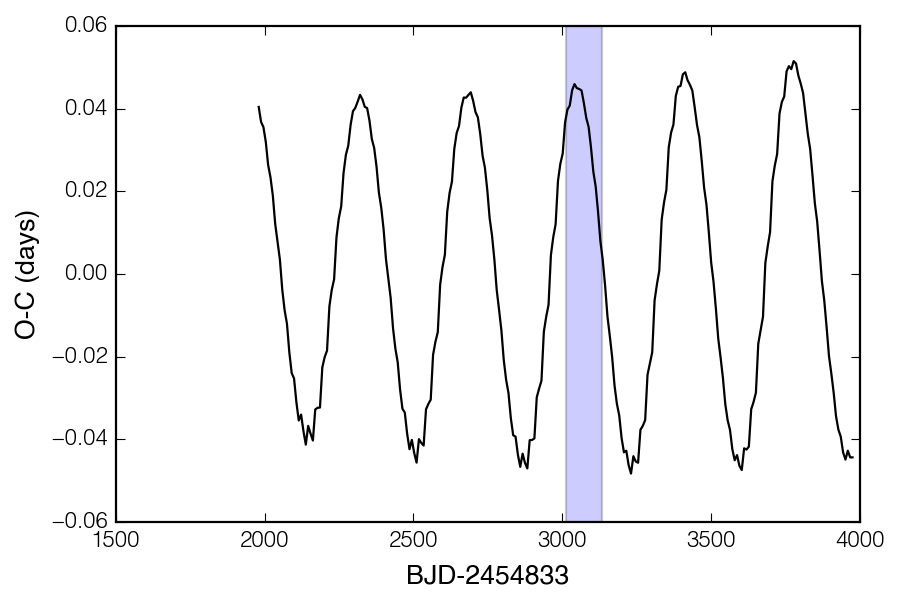

In [97]:
%pylab inline
rc('savefig',dpi=160)
p1 = df[df.i_planet==1]
p2 = df[df.i_planet==2]

#ttv.plotting.plot_omc(p1.i_epoch,p1.time,params['per1'].value+0.00025,params['T1'].value)
per,t0 = np.polyfit(p1.i_epoch,p1.time,1)

ttv.plotting.plot_omc(p1.i_epoch,p1.time,per,t0)

t1 = Time('2017-04-01',format='iso').jd 
t2 = Time('2017-07-31',format='iso').jd 
axvspan(t1- bjd0,t2-bjd0,alpha=0.2)
ylabel('O-C (days)')
xlabel('BJD-2454833')

#ttv.plotting.plot_omc(p2.i_epoch,p2.time,params['per2'].value,params['T2'].value)

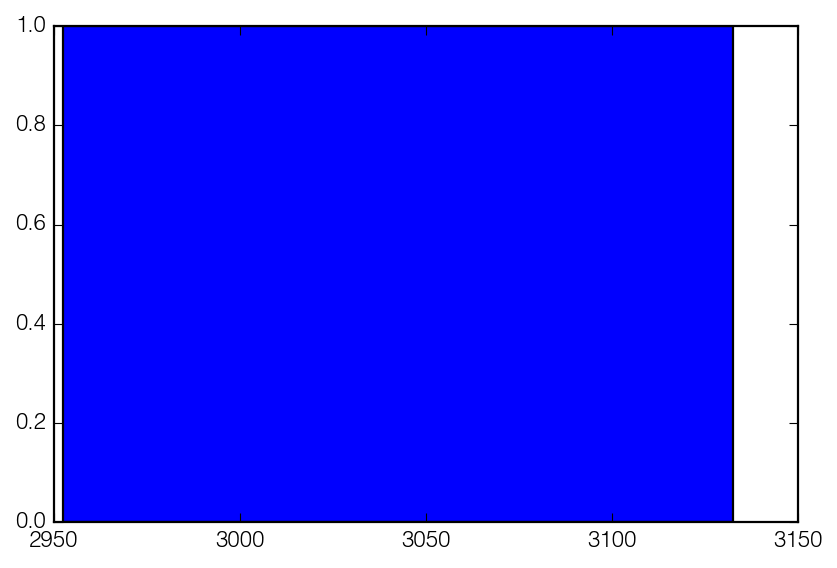